In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(1000)
df.to_csv("BA_reviews.csv")
dataset = pd.read_csv("BA_reviews.csv")
print(dataset.head())


   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |  A serious medical problem a...
1           1  ✅ Trip Verified |  I haven't flown British Air...
2           2  Not Verified |  My itinerary was supposed to b...
3           3  ✅ Trip Verified |  Busy day at LHR and flight ...
4           4  ✅ Trip Verified | Worst seats I have ever enco...


In [5]:
!pip install wordcloud
!pip install --upgrade scikit-learn
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


In [6]:
dataset = pd.read_csv("BA_reviews.csv")
dataset['reviews']=dataset['reviews'].apply(lambda x:" ".join(x.lower() for x in x.split()) )
# removing punctuations,special characters

dataset['reviews']= dataset['reviews'].str.replace ('[^\w\s]+|\d+', '', regex=True)
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
ps=nltk.PorterStemmer()

def stemming(reviews):

    return " ".join([ps.stem(word) for word in reviews.split()])
def tokenize(reviews):
    tokens=re.split('\W+',reviews)
    return tokens

dataset['reviews'] = dataset['reviews'].apply(lambda x: remove_stop(x))
dataset['reviews']=dataset['reviews'].apply(lambda x: stemming(x))
dataset['reviews']=dataset['reviews'].apply(lambda x: tokenize(x))
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asifsiraz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,reviews
0,0,"[trip, verifi, seriou, medic, problem, appear,..."
1,1,"[trip, verifi, havent, flown, british, airway,..."
2,2,"[verifi, itinerari, suppos, la, vegaschicagolo..."
3,3,"[trip, verifi, busi, day, lhr, flight, full, l..."
4,4,"[trip, verifi, worst, seat, ever, encount, eco..."


In [7]:
def lemmatizing(reviews):
    reviews=[word for word in reviews]
    return reviews
dataset['reviews']=dataset['reviews'].apply(lambda x: lemmatizing(x))

# View the updated dataset
dataset.head()

,Unnamed: 0,reviews
0,0,"[trip, verifi, seriou, medic, problem, appear,..."
1,1,"[trip, verifi, havent, flown, british, airway,..."
2,2,"[verifi, itinerari, suppos, la, vegaschicagolo..."
3,3,"[trip, verifi, busi, day, lhr, flight, full, l..."
4,4,"[trip, verifi, worst, seat, ever, encount, eco..."


In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sentiments = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset['reviews'])):
    text = row['reviews']
    encoded_text = ' '.join(text)  # Convert the list of words to a string
    scores = sentiments.polarity_scores(encoded_text)  # Apply polarity scores to the encoded text
    res[i] = scores
vaders=pd.DataFrame(res).T
vaders.head(1000)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/asifsiraz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 425.00it/s]


,neg,neu,pos,compound
0,0.157,0.688,0.155,-0.0258
1,0.027,0.973,0.000,-0.0790
2,0.076,0.892,0.032,-0.7506
3,0.000,0.640,0.360,0.9485
4,0.209,0.713,0.078,-0.8442
...,...,...,...,...
995,0.019,0.772,0.209,0.9831
996,0.174,0.751,0.075,-0.7356
997,0.049,0.787,0.163,0.6374
998,0.095,0.708,0.197,0.7918


In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd

sentiments = SentimentIntensityAnalyzer()

# Create a list to store the sentiment labels
sentiment_labels = []

# Iterate through each review in the dataset
for i, row in tqdm(dataset.iterrows(), total=len(dataset['reviews'])):
    text = row['reviews']
    encoded_text = ' '.join(text)
    scores = sentiments.polarity_scores(encoded_text)
    res[i] = scores  

    # Determine the sentiment label based on the score
    if scores['pos'] > scores['neg']:
        sentiment = 'positive'
    elif scores['pos'] < scores['neg']:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    sentiment_labels.append(sentiment)

# Add the sentiment labels to the dataset as a new column
dataset['sentiment'] = sentiment_labels

# Print the dataset with the sentiment column
dataset.head(1000)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/asifsiraz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 339.91it/s]


,Unnamed: 0,reviews,sentiment
0,0,"[trip, verifi, seriou, medic, problem, appear,...",negative
1,1,"[trip, verifi, havent, flown, british, airway,...",negative
2,2,"[verifi, itinerari, suppos, la, vegaschicagolo...",negative
3,3,"[trip, verifi, busi, day, lhr, flight, full, l...",positive
4,4,"[trip, verifi, worst, seat, ever, encount, eco...",negative
...,...,...,...
995,995,"[trip, verifi, gatwick, faro, club, check, gat...",positive
996,996,"[trip, verifi, jeddah, chicago, via, london, f...",negative
997,997,"[trip, verifi, london, frankfurt, need, fli, b...",positive
998,998,"[trip, verifi, gatwick, malaga, book, ticket, ...",positive


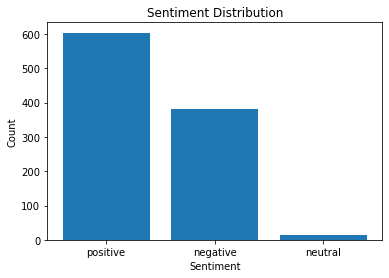

In [10]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each sentiment label
sentiment_counts = dataset['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [11]:

from sklearn.feature_extraction.text import TfidfVectorizer


In [12]:
Tfidf_vect=TfidfVectorizer(analyzer=lemmatizing)
x_Tfidf =Tfidf_vect.fit_transform(dataset['reviews'])
print(x_Tfidf.shape)
print(Tfidf_vect.get_feature_names_out())
Tfidf_dataset=pd.DataFrame(x_Tfidf.toarray())
Tfidf_dataset

(1000, 5229)
['aa' 'ab' 'abandon' ... 'zurich' 'zusammenschluss' 'über']


,0,1,2,3,4,5,6,7,8,9,...,5219,5220,5221,5222,5223,5224,5225,5226,5227,5228
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079098,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(Tfidf_dataset, dataset['sentiment'], test_size=0.25)

def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    label = ['positive', 'negative']  # Specify the positive label here
    precision, recall, fscore, support = score(Y_test, Y_pred, labels=label, average=None)
    accuracy = np.mean(Y_pred == Y_test)
    print(f"Est: {n_est}/Depth: {depth} ---- Precision: {precision[0]:.3f} / Recall: {recall[0]:.3f} / Accuracy: {accuracy:.3f}")

estimators = [10, 50, 100]
depths = [10, 20, 30, None]

for n_est in estimators:
    for depth in depths:
        train_rf(n_est, depth) 


Est: 10/Depth: 10 ---- Precision: 0.683 / Recall: 0.902 / Accuracy: 0.684
Est: 10/Depth: 20 ---- Precision: 0.759 / Recall: 0.928 / Accuracy: 0.768
Est: 10/Depth: 30 ---- Precision: 0.771 / Recall: 0.856 / Accuracy: 0.740
Est: 10/Depth: None ---- Precision: 0.761 / Recall: 0.810 / Accuracy: 0.716
Est: 50/Depth: 10 ---- Precision: 0.718 / Recall: 0.967 / Accuracy: 0.744
Est: 50/Depth: 20 ---- Precision: 0.758 / Recall: 0.941 / Accuracy: 0.776
Est: 50/Depth: 30 ---- Precision: 0.758 / Recall: 0.941 / Accuracy: 0.768
Est: 50/Depth: None ---- Precision: 0.803 / Recall: 0.908 / Accuracy: 0.800
Est: 100/Depth: 10 ---- Precision: 0.708 / Recall: 0.980 / Accuracy: 0.732
Est: 100/Depth: 20 ---- Precision: 0.770 / Recall: 0.941 / Accuracy: 0.784
Est: 100/Depth: 30 ---- Precision: 0.767 / Recall: 0.948 / Accuracy: 0.780
Est: 100/Depth: None ---- Precision: 0.772 / Recall: 0.928 / Accuracy: 0.784


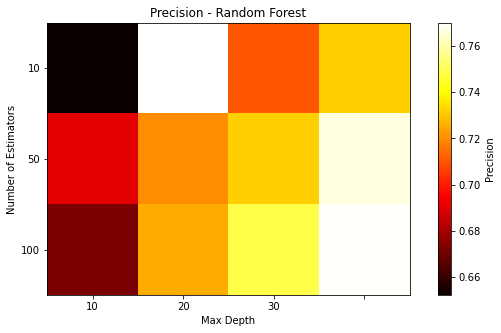

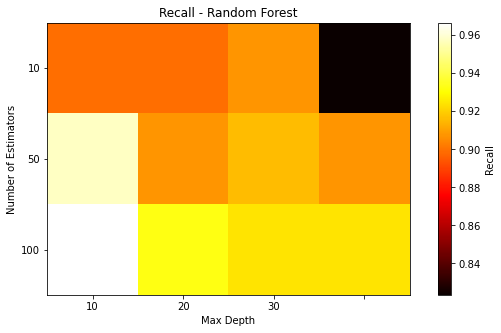

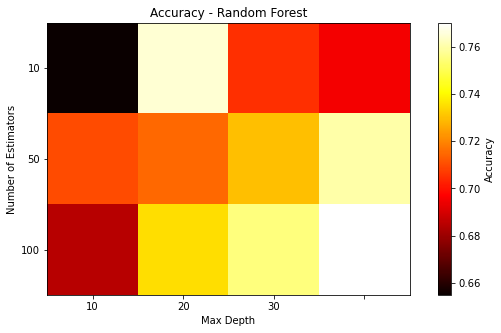

In [27]:
import matplotlib.pyplot as plt

def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    label = 'positive'  # Specify the positive label here
    precision, recall, fscore, support = score(Y_test, Y_pred, labels=[label], average=None)
    accuracy = np.mean(Y_pred == Y_test)
    return precision[0], recall[0], accuracy

estimators = [10, 50, 100]
depths = [10, 20, 30, None]

precisions = []
recalls = []
accuracies = []

for n_est in estimators:
    for depth in depths:
        precision, recall, accuracy = train_rf(n_est, depth)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)

# Reshape the scores into a grid for plotting
precisions = np.array(precisions).reshape(len(estimators), len(depths))
recalls = np.array(recalls).reshape(len(estimators), len(depths))
accuracies = np.array(accuracies).reshape(len(estimators), len(depths))

# Plotting precision
plt.figure(figsize=(10, 5))
plt.imshow(precisions, cmap='hot', interpolation='nearest')
plt.colorbar(label='Precision')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Precision - Random Forest')
plt.show()

# Plotting recall
plt.figure(figsize=(10, 5))
plt.imshow(recalls, cmap='hot', interpolation='nearest')
plt.colorbar(label='Recall')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Recall - Random Forest')
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.imshow(accuracies, cmap='hot', interpolation='nearest')
plt.colorbar(label='Accuracy')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Accuracy - Random Forest')
plt.show()


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
X_train, X_test, Y_train, Y_test = train_test_split(Tfidf_dataset, dataset['sentiment'], test_size=0.20)

label = ['positive', 'negative']

def train_gb(est, max_depth, lr, subsample):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr, random_state=42, subsample=subsample)
    gb_model = gb.fit(X_train, Y_train)
    Y_pred = gb_model.predict(X_test)

    precision, recall, fscore, support = score(Y_test, Y_pred, labels=label, average='weighted', zero_division=0)
    accuracy = ((Y_pred == Y_test).sum() / len(Y_pred))

    print("Est: {} Depth: {} lr: {} subsample: {}".format(est, max_depth, lr, subsample))
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)

for est in [50, 100]:
    for max_depth in [3, 7]:
        for lr in [ 0.01, 1]:
            for subsample in [0.5, 0.75]:
                train_gb(est, max_depth, lr, subsample)


Est: 50 Depth: 3 lr: 0.01 subsample: 0.5
Precision: 0.7302112029384755
Recall: 0.7121212121212122
Accuracy: 0.705
Est: 50 Depth: 3 lr: 0.01 subsample: 0.75
Precision: 0.7154130591630592
Recall: 0.696969696969697
Accuracy: 0.69
Est: 50 Depth: 3 lr: 0.01 subsample: 1
Precision: 0.7154130591630592
Recall: 0.696969696969697
Accuracy: 0.69
Est: 50 Depth: 3 lr: 0.1 subsample: 0.5
Precision: 0.7688143305511013
Recall: 0.7777777777777778
Accuracy: 0.77
Est: 50 Depth: 3 lr: 0.1 subsample: 0.75
Precision: 0.7633398285401428
Recall: 0.7727272727272727
Accuracy: 0.765
Est: 50 Depth: 3 lr: 0.1 subsample: 1
Precision: 0.778750067520121
Recall: 0.7878787878787878
Accuracy: 0.78
Est: 50 Depth: 3 lr: 1 subsample: 0.5
Precision: 0.6451543365446493
Recall: 0.6515151515151515
Accuracy: 0.645
Est: 50 Depth: 3 lr: 1 subsample: 0.75
Precision: 0.7345880500960714
Recall: 0.7272727272727273
Accuracy: 0.72
Est: 50 Depth: 3 lr: 1 subsample: 1
Precision: 0.7348084014750681
Recall: 0.7373737373737373
Accuracy: 0.7

Est: 150 Depth: 11 lr: 0.01 subsample: 0.75
Precision: 0.7688143305511013
Recall: 0.7777777777777778
Accuracy: 0.77
Est: 150 Depth: 11 lr: 0.01 subsample: 1
Precision: 0.7273779461279462
Recall: 0.7373737373737373
Accuracy: 0.73
Est: 150 Depth: 11 lr: 0.1 subsample: 0.5
Precision: 0.7633398285401428
Recall: 0.7727272727272727
Accuracy: 0.765
Est: 150 Depth: 11 lr: 0.1 subsample: 0.75
Precision: 0.7837384800544442
Recall: 0.7929292929292929
Accuracy: 0.785
Est: 150 Depth: 11 lr: 0.1 subsample: 1
Precision: 0.7924553938333465
Recall: 0.797979797979798
Accuracy: 0.79
Est: 150 Depth: 11 lr: 1 subsample: 0.5
Precision: 0.645285787658669
Recall: 0.6161616161616161
Accuracy: 0.61
Est: 150 Depth: 11 lr: 1 subsample: 0.75
Precision: 0.7855550648749816
Recall: 0.7828282828282829
Accuracy: 0.775
Est: 150 Depth: 11 lr: 1 subsample: 1
Precision: 0.7787417182578473
Recall: 0.7727272727272727
Accuracy: 0.765
